# First Goal (Acquisition) 
<b>Goal </b>: Know different sources and types of environmental data and be able to use these sources to obtain data. <p>
<b>Present</b>: I currently only know that a lot of environmental data should be freely accessible and how to read csv-files into Python.<p>
<b>Measure</b>: At the end of the course, I want to be able to connect to and obtain data from two different APIs.


## First API - Google Earth Engine
The Google Earth Engine is a large,Google-powered online catalog that includes satelite images and other spatial data. Being able to load data from Google Earth Engine opens the door to a great variety of spatial data. Next to the possibility of working with the catalog online in the Google Earth Engine *Code Editor*, a Python API supports a direct connection to the Google Earth Engine. <p>
For more information go to:
- https://earthengine.google.com/
- https://developers.google.com/earth-engine/tutorials/community/intro-to-python-api-guiattard <p>

Within this section, I load two spatial datasets from the Google Earth Engine and combine them in an interactive folium map.

In [1]:
#Import of relevant modules
import geopandas as gpd
import folium
import ee

In [2]:
#Initialize Earth Engine 
ee.Initialize()

In [3]:
#Create a function that allows to map spatial layers from the Google Earth Engine with folium, a module to create interactive leaflet maps
def add_ee_layer(self, ee_image_object, vis_params, name):
    """Adds a method for displaying Earth Engine image tiles to folium map."""
    map_id_dict = ee.Image(ee_image_object).getMapId(vis_params)
    folium.raster_layers.TileLayer(
        tiles=map_id_dict['tile_fetcher'].url_format,
        attr='Map Data &copy; <a href="https://earthengine.google.com/">Google Earth Engine</a>',
        name=name,
        overlay=True,
        control=True
    ).add_to(self)

# Add Earth Engine as drawing method to folium
folium.Map.add_ee_layer = add_ee_layer

In [4]:
#Load Global Landcover map from European Space Agency from Google Earth Engine
landsat = ee.Image("ESA/GLOBCOVER_L4_200901_200912_V2_3")
landsat_viz_params = {
    'bands': ['landcover'],
}

#Load global country boarders from Google Earth Engine
countries = ee.FeatureCollection('FAO/GAUL/2015/level0').select('ADM0_NAME')

#Filter the feature collection to subset Austria
austria = countries.filter(ee.Filter.eq('ADM0_NAME', 'Austria'))

In [5]:
#Generate a interactive map via folium. The location is my hometown - Graz in the province of Styria.
map = folium.Map(location=[47.074874, 15.440304], tiles='Stamen Toner', zoom_start=11)
#Limit the LULC map on the area of Austria
map_clip = landsat.clip(austria)

#Add the LULC map to the folium map
map.add_ee_layer(map_clip, landsat_viz_params, 'LULC')
display(map)

Welcome to the wonderful city of Graz! The landuse map clearly shows the urban areas of Graz and its surrounding cities, as well as the large lake in the South of the city which is a very lively place in summer.

## Second API - Eurostat
Eurostat is the statistical office of the European Union. The ability to use the Eurostat Python API allows quick and easy access to a huge variety of relieable data. Within this section, I explore the correlation between environmental tax height and innovations with environmental benefits.  

In [6]:
#Import of relevant modules
import eurostat
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

The cell below shows all datasets in Eurostat that include the word 'environment'.

In [7]:
#Read general table of contents (TOC) in DataFrame
toc_df = eurostat.get_toc_df()
#Search for environmental data
search = eurostat.subset_toc_df(toc_df, 'environment')
#Only look at results that are of the type 'dataset'
search[search['type']=='dataset']

,title,code,type,last update of data,last table structure change,data start,data end
594,"Pollution, grime or other environmental proble...",ilc_mddw05,dataset,23.04.2021,11.02.2021,2003,2020
732,Environment - cities and greater cities,urb_cenv,dataset,22.04.2021,08.02.2021,1989,2019
742,Environment - functional urban areas,urb_lenv,dataset,22.04.2021,31.03.2021,1990,2019
855,Aquaculture production by aquatic environment,enps_fish_aq2a,dataset,16.04.2021,,2005,2019
2214,"Pollution, grime or other environmental proble...",hlth_dhc120,dataset,23.04.2021,11.02.2021,2010,2020
2301,"Accidents at work by sex, age, severity, NACE ...",hsw_ph3_02,dataset,22.02.2021,17.02.2021,2014,2019
2343,Number of accidents at work by working environ...,hsw_aw_we1,dataset,26.03.2009,08.02.2021,2005,2005
2344,Incidence rate of accidents at work by working...,hsw_aw_we2,dataset,26.03.2009,08.02.2021,2005,2005
2345,Percentage distribution of accidents at work b...,hsw_aw_we3,dataset,26.03.2009,08.02.2021,2005,2005
4488,Material deprivation for the 'Environment' dim...,ilc_mddd05,dataset,23.04.2021,11.02.2021,2003,2020


In [8]:
#Get data from the databases env_ac_tax (Environmental tax revenues) and inn_cis6_eco (Innovations with environmental benefits)
tax = eurostat.get_data_df('env_ac_tax')
inn = eurostat.get_data_df('inn_cis6_eco')

Let's start with working on the tax Dataframe! The goal is to firstly filter the dataframe and secondly to restructure  the dataframe in order to enable easy plotting and merging procedures.

In [9]:
#Check tax DataFrame
tax.head()

,tax,unit,geo\time,2019,2018,2017,2016,2015,2014,2013,...,2004,2003,2002,2001,2000,1999,1998,1997,1996,1995
0,ENV,MIO_EUR,AT,9149.93,8855.83,8844.75,8384.12,8203.70,7974.95,7725.21,...,6465.45,6249.50,5959.88,5694.63,5165.67,4710.28,4484.87,4419.03,4051.30,3974.84
1,ENV,MIO_EUR,BE,12557.70,12415.90,11992.00,11469.00,10618.10,10254.50,9905.50,...,7518.30,6796.20,6401.60,6320.60,6167.00,6283.80,5985.54,5945.31,5851.04,5303.99
2,ENV,MIO_EUR,BG,1903.74,1648.12,1510.71,1418.92,1437.71,1209.73,1227.05,...,647.49,542.07,398.56,394.98,372.45,298.73,258.29,122.75,84.20,183.71
3,ENV,MIO_EUR,CH,9039.28,8601.46,8527.64,8557.99,8474.15,7264.69,7024.05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ENV,MIO_EUR,CY,578.40,627.60,604.90,554.20,544.30,534.10,490.00,...,505.66,445.30,327.68,318.51,266.78,222.85,209.93,188.62,200.23,198.75


In [10]:
#Filter tax DataFrame for data of relevance
tax = tax[tax['tax'] == 'ENV']
tax = tax[tax['unit'] == 'MIO_EUR']
#Transpose tax and reset index
tax = tax.transpose()
tax = tax.reset_index()
tax.head()

,index,0,1,2,3,4,5,6,7,8,...,27,28,29,30,31,32,33,34,35,36
0,tax,ENV,ENV,ENV,ENV,ENV,ENV,ENV,ENV,ENV,...,ENV,ENV,ENV,ENV,ENV,ENV,ENV,ENV,ENV,ENV
1,unit,MIO_EUR,MIO_EUR,MIO_EUR,MIO_EUR,MIO_EUR,MIO_EUR,MIO_EUR,MIO_EUR,MIO_EUR,...,MIO_EUR,MIO_EUR,MIO_EUR,MIO_EUR,MIO_EUR,MIO_EUR,MIO_EUR,MIO_EUR,MIO_EUR,MIO_EUR
2,geo\time,AT,BE,BG,CH,CY,CZ,DE,DK,EA19,...,NO,PL,PT,RO,RS,SE,SI,SK,TR,UK
3,2019,9149.93,12557.7,1903.74,9039.28,578.4,4594.86,61111.0,10237.08,280041.15,...,7632.65,14070.41,5410.49,4731.71,NaN,9779.3,1605.11,2245.98,15204.31,58829.76
4,2018,8855.83,12415.9,1648.12,8601.46,627.6,4129.14,59731.0,10933.37,275978.62,...,8109.82,13474.36,5271.9,4033.41,1791.01,9813.81,1568.06,2202.67,15967.52,56737.24


In [11]:
#Restructure tax DataFrame
#Read country labels into variable 'countries'. This variable is then used to rename the columns of the dataframe.
countries = tax.loc[2][1:].values
countries = np.insert(countries,0, 'year')
tax.columns = countries
tax = tax.drop([0, 1, 2], axis = 0)
tax = tax.reset_index()
tax = tax.drop(['index', 'EA19', 'EU27_2020', 'EU28'], axis=1)
tax.head()

,year,AT,BE,BG,CH,CY,CZ,DE,DK,EE,...,NO,PL,PT,RO,RS,SE,SI,SK,TR,UK
0,2019,9149.93,12557.7,1903.74,9039.28,578.4,4594.86,61111.0,10237.08,889.55,...,7632.65,14070.41,5410.49,4731.71,NaN,9779.3,1605.11,2245.98,15204.31,58829.76
1,2018,8855.83,12415.9,1648.12,8601.46,627.6,4129.14,59731.0,10933.37,708.95,...,8109.82,13474.36,5271.9,4033.41,1791.01,9813.81,1568.06,2202.67,15967.52,56737.24
2,2017,8844.75,11992.0,1510.71,8527.64,604.9,3896.98,59258.0,10808.24,680.76,...,8123.51,12512.1,5051.86,3640.19,1614.57,10150.08,1587.4,2149.02,24392.9,55848.84
3,2016,8384.12,11469.0,1418.92,8557.99,554.2,3728.38,58442.0,11065.36,645.19,...,8044.15,11556.66,4819.31,4085.32,1516.05,10341.43,1568.7,2019.35,26534.3,58326.01
4,2015,8203.7,10618.1,1437.71,8474.15,544.3,3477.33,58073.0,10847.41,562.83,...,8169.19,11401.74,4344.47,3951.84,1384.87,9801.25,1509.36,1997.55,26459.7,63868.07


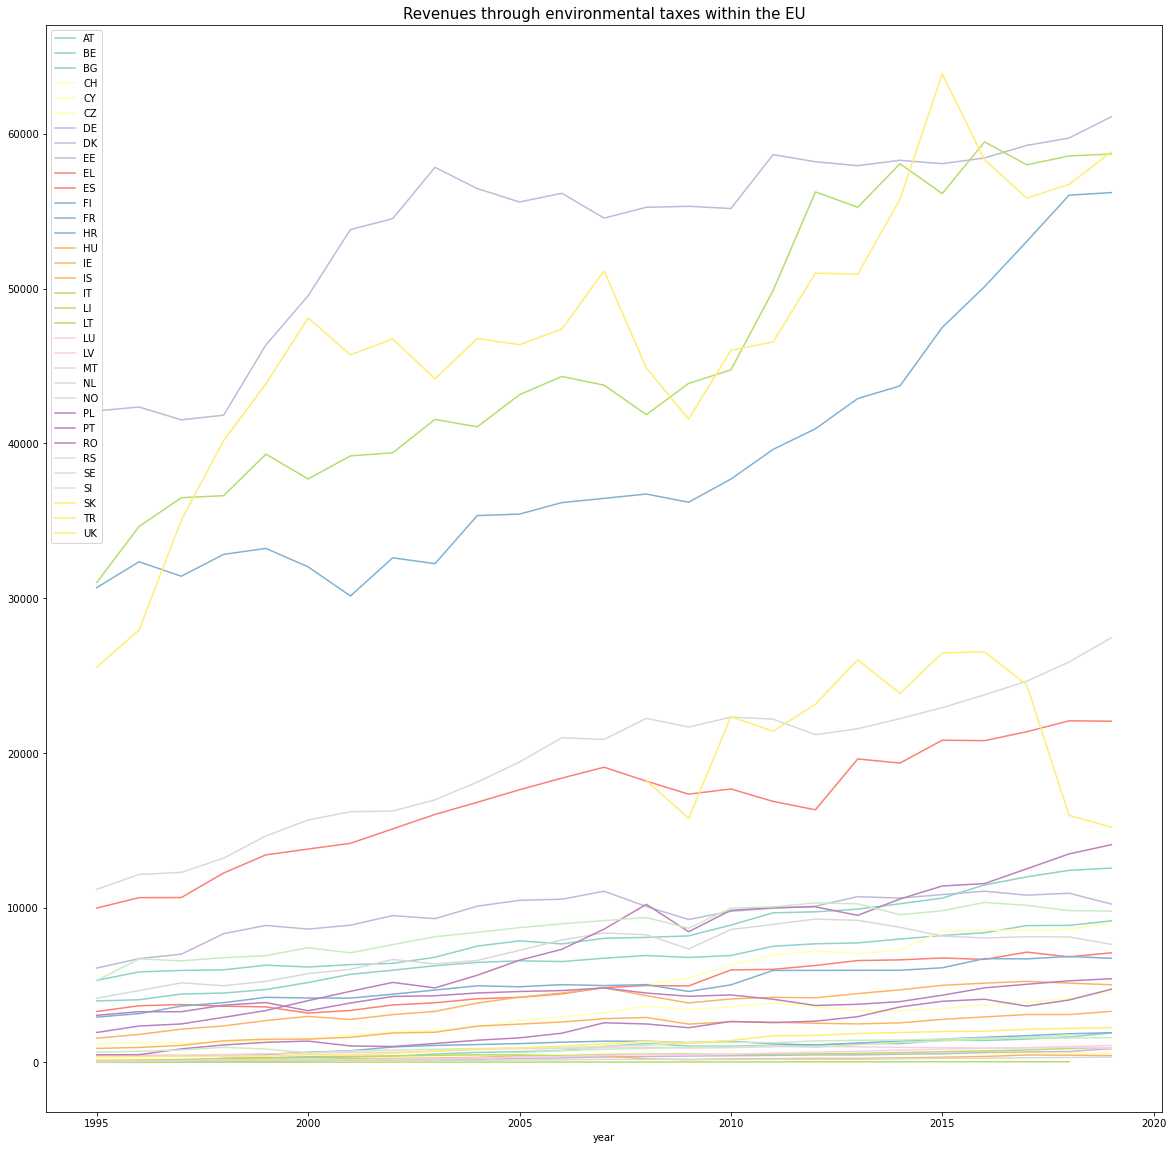

In [12]:
#Create lineplot for tax DataFrame that shows the environmental tax revenues for each country per year to explore trends
fig, ax = plt.subplots(figsize = (20, 20))
tax.plot(x = 'year', kind = 'line', ax=ax, colormap = 'Set3')
ax.set_title('Revenues through environmental taxes within the EU', fontsize = 15)
plt.show()

The plot shows a generally positive trend in the revenues through environmental taxes and that some countries generate significantly more revenue through environmental taxes than others.<p> Let's now focus on the innovation dataframe!

In [13]:
#Check inn DataFrame
inn.head()

,indic_in,nace_r2,sizeclas,unit,type_inn,time\geo,BE,BG,CZ,DE,...,HU,MT,NL,AT,PL,PT,RO,SK,FI,SE
0,ECOCO,A,TOTAL,NR,INNO,2008,NaN,NaN,NaN,NaN,...,NaN,NaN,155.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ECOCO,A,TOTAL,RT,INNO,2008,NaN,NaN,NaN,NaN,...,NaN,NaN,0.2539,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ECOCO,A01,TOTAL,NR,INNO,2008,NaN,NaN,NaN,NaN,...,NaN,NaN,153.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ECOCO,A01,TOTAL,RT,INNO,2008,NaN,NaN,NaN,NaN,...,NaN,NaN,0.2572,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ECOCO,A02,TOTAL,NR,INNO,2008,NaN,NaN,NaN,NaN,...,NaN,0.0,2.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
#Filter on sizeclass and units
inn = inn[inn['sizeclas'] == 'TOTAL']
inn = inn[inn['unit'] == 'NR']
print('Years in inn: ', inn ['time\geo'].unique())
inn.head()

Years in inn:  ['2008']


,indic_in,nace_r2,sizeclas,unit,type_inn,time\geo,BE,BG,CZ,DE,...,HU,MT,NL,AT,PL,PT,RO,SK,FI,SE
0,ECOCO,A,TOTAL,NR,INNO,2008,NaN,NaN,NaN,NaN,...,NaN,NaN,155.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ECOCO,A01,TOTAL,NR,INNO,2008,NaN,NaN,NaN,NaN,...,NaN,NaN,153.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ECOCO,A02,TOTAL,NR,INNO,2008,NaN,NaN,NaN,NaN,...,NaN,0.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,ECOCO,A03,TOTAL,NR,INNO,2008,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,ECOCO,B,TOTAL,NR,INNO,2008,9.0,4.0,15.0,180.0,...,6.0,NaN,7.0,29.0,25.0,44.0,27.0,3.0,NaN,9.0


The next step is to create a series-object that only includes the aggregated sum of all innovations for each country.

In [15]:
#Create dataframe that shows total amount of innovations for each country per year
inn = inn.iloc[0:, 6:].agg('sum')

print(inn.shape)
inn.head()

(23,)


BE     106612.0
BG      19875.0
CZ     201163.0
DE    1681212.0
EE      12714.0
dtype: float64

Unfortunately, innovation data is only available for the year of 2008. Therefore, the tax dataframe gets also limited to the same year.

In [16]:
#Combine tax revenues with innovations for year 2008
tax_2008 = tax[tax['year']==2008].transpose()
tax_2008.columns = ['Tax_MIO_EUR']
tax_2008 = tax_2008.drop(['year'], axis = 0)
#For merging-process, inn objects needs to have a name
inn.name = 'inn'

tax_2008.head()

,Tax_MIO_EUR
AT,6911.34
BE,8081.1
BG,1221.77
CH,5078.09
CY,574.2


In the following, the two dataframes, tax and inn, are merged together to one dataframe object (mix). Then a correlation analysis between the two variables is conducted.

In [17]:
#Merge tax and inn
mix = pd.merge(left = inn, right = tax_2008, how = 'inner', left_index = True, right_index = True)
mix.rename(columns = {'index':'Country', 'inn':'Number of env. Innovations'}, inplace = True)

#Note: not all countries are represented anymore = > those with no innovation or tax data in 2008
mix.head()

,Number of env. Innovations,Tax_MIO_EUR
BE,106612.0,8081.1
BG,19875.0,1221.77
CZ,201163.0,3643.79
DE,1681212.0,55257.0
EE,12714.0,382.46


In [18]:
#Check correlation
mix = mix.astype(float)
mix.corr()

,Number of env. Innovations,Tax_MIO_EUR
Number of env. Innovations,1.000000,0.904875
Tax_MIO_EUR,0.904875,1.000000


The final step is to produce a visualisation that shows the correlation between the two variables of interest. In order to be able to plot both variables in the same plot, the data needs to get normalised. 

In [19]:
#To visualise both in one graph, use of relative values
#Calculate relative values
mean_tax = mix['Tax_MIO_EUR'].mean()
mean_inn = mix['Number of env. Innovations'].mean()
print(
    ' Average Tax [MIO] is: ', mean_tax, '\n',
    'Average number of Innovations is: ', mean_inn
)
#Append relative values to dataframe
mix['rel. Tax'] = mix['Tax_MIO_EUR'] / mean_tax
mix['rel. Innovations'] = mix['Number of env. Innovations'] / mean_inn
mix.head()

 Average Tax [MIO] is:  9593.599130434783 
 Average number of Innovations is:  189790.04347826086


,Number of env. Innovations,Tax_MIO_EUR,rel. Tax,rel. Innovations
BE,106612.0,8081.10,0.842343,0.561737
BG,19875.0,1221.77,0.127353,0.104721
CZ,201163.0,3643.79,0.379815,1.059924
DE,1681212.0,55257.00,5.759778,8.858273
EE,12714.0,382.46,0.039866,0.066990


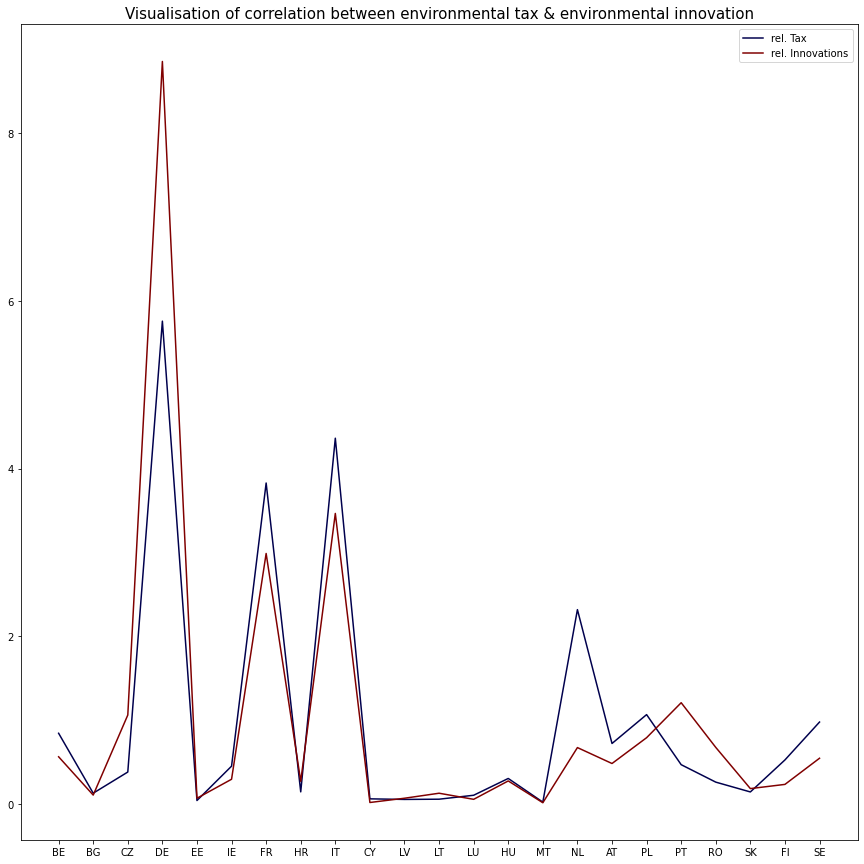

In [20]:
#Create lineplot
fig, ax = plt.subplots(figsize = (15, 15))
mix.plot(y = ['rel. Tax', 'rel. Innovations'], kind = 'line', ax=ax, colormap = 'seismic')
#Adjust labels on x-axis
plt.xticks(range(0,len(mix.index)), mix.index)
#Add title
ax.set_title('Visualisation of correlation between environmental tax & environmental innovation', fontsize = 15)
plt.show()

## Results/Discussion
While both APIs allow access to an enormous range of datasets, the Google Earth Engine API was noticeably harder to apply. This has at least two reasons. Firstly, a Google account that is authorized to use the Google Earth Engine is needed in order to connect with the API. Secondly, compared to the Eurostat API, it is not equally easy to load and inspect datasets. The reasons for these two drawbacks of the Google Earth Engine API may come from the facts, that Google is - in contrast to Eurostat - a profit-oriented company, and therefore requires subscriptions to use its services, and that spatial data is generally not as handy and easy to use as panda dataframes.<p>
Eventually, I want to briefly reflect on the conducted correlation analysis in the second part of this notebook. The analysis shows a clear, mathematical as well as visual, correlation between the revenues generated through environmental taxes and environmental beneficial innovations. It is inviting to assume a causal relationship between these two variables, potentially justifying higher environmental taxes. However, it must be noted that the conducted analysis does not support such claims. Alternative explanations are manifold. Both variables might, for example, only reflect the  economic power of certain states.<p>
Overall, APIs provide a fantastic way to connect to and access web-based data platforms that contain environmental data.